In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

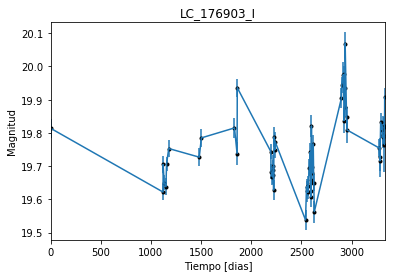

In [2]:
data = np.genfromtxt('LC_176903_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176903_I')
plt.savefig("LC_176903_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

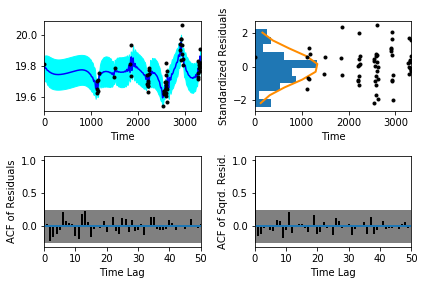

In [5]:
sample.assess_fit()

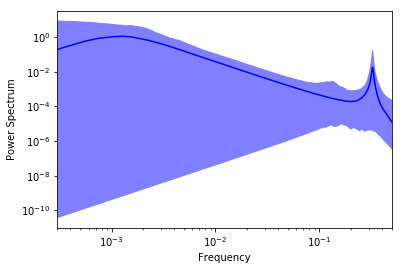

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

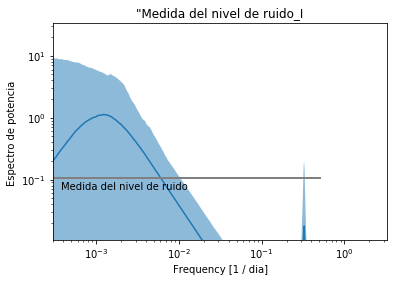

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176903_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176903_I')

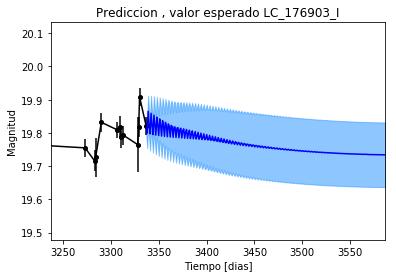

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176903_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176903_I')

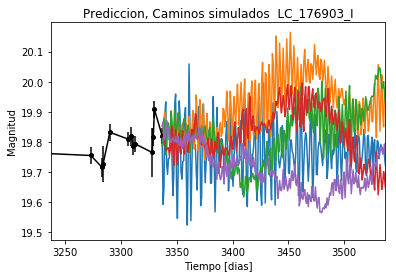

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176903_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


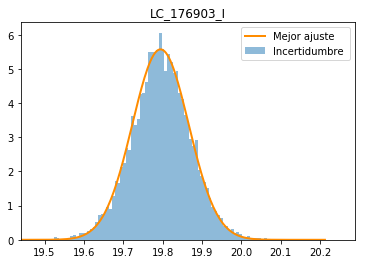

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_176903_I')
plt.savefig("Mejor_ajuste_LC_176903_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176903_I')

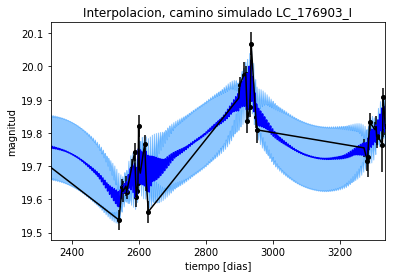

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_I')

Text(0.5,1,'Interpolacion, camino simulado LC_176903_I')

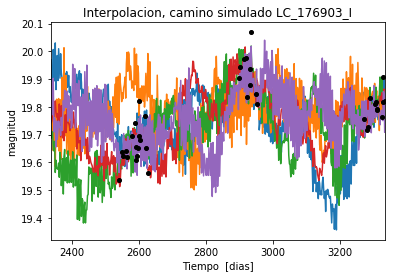

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 607.672403552
Median: 0.00296911280062
Standard deviation: 0.0298122959928
68% credibility interval: [ 0.00144731  0.00712384]
95% credibility interval: [ 0.00061125  0.02641926]
99% credibility interval: [ 0.00033784  0.15222157]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 401.25538783
Median: 0.00296563018475
Standard deviation: 0.0223849983309
68% credibility interval: [ 0.00144731  0.00708527]
95% credibility interval: [ 0.00060881  0.02502098]
99% credibility interval: [ 0.00033782  0.11696372]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 205.951987277
Median: 0.00098410729916
Standard deviation: 0.125581587862
68

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 188.270231024
Median: 103.324195767
Standard deviation: 2.84989504094
68% credibility interval: [  99.57751425  105.14718154]
95% credibility interval: [  95.77627927  106.53981936]
99% credibility interval: [  93.44547858  106.67897364]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 211.066347365
Median: 0.0829938645806
Standard deviation: 0.86939934351
68% credibility interval: [ 0.03981754  0.25089662]
95% credibility interval: [ 0.02338141  3.2618933 ]
99% credibility interval: [ 0.01385516  5.56485231]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 68.4982782542
Median: 4.32758673095
Standard deviation: 15.9778680777
68% credibility interval: [  4.1036763   43.26821694]
95% credibility interval: [  1.10451772 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 884.081272777
Median: 2.97137781339e+24
Standard deviation: 1.15951739736e+89
68% credibility interval: [  4.47616242e+08   6.97744923e+53]
95% credibility interval: [  4.13349353e-39   2.77159649e+67]
99% credibility interval: [  1.19193078e-107   1.43176659e+086]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 458.646744708
Median: 19.7576207253
Standard deviation: 0.0325886964559
68% credibility interval: [ 19.72921047  19.78679223]
95% credibility interval: [ 19.69004958  19.82559791]
99% credibility interval: [ 19.66824468  19.85305144]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 63.4515443112
Median: 0.330272280211
Standard deviation: 0.277091709129
68% credibility interval: [ 0.32192886  0.99893869]
95% credibility interval: [ 0.15982953  1.0029624 ]
99% credibility interval: [ 0.07147995  1.00489897]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 63.4515443112
Median: 0.330272280211
Standard deviation: 0.277091709129
68% credibility interval: [ 0.32192886  0.99893869]
95% credibility interval: [ 0.15982953  1.0029624 ]
99% credibility interval: [ 0.07147995  1.00489897]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 79.1511072862
Median: 0.000807123602896
Standard deviation: 0.1459926924

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 188.270231024
Median: 103.324195767
Standard deviation: 2.84989504094
68% credibility interval: [  99.57751425  105.14718154]
95% credibility interval: [  95.77627927  106.53981936]
99% credibility interval: [  93.44547858  106.67897364]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 265.376482029
Median: 0.0120823982937
Standard deviation: 0.00611140616061
68% credibility interval: [ 0.00837975  0.01852066]
95% credibility interval: [ 0.00611447  0.0289604 ]
99% credibility interval: [ 0.00497285  0.03922375]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 466.701501205
Median: 1.12989940845
Standard deviation: 0.275646968613
68% credibility interval: [ 0.8990523   1.45883242]
95% credibility interval: [ 0.76267887  1.81586651]
99% credibility interval: [ 0.68968201  1.94586011]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 264.643683545
Median: 1.75140147391e-26
Standard deviation: 0.0493218599528
68% credibility interval: [  6.71394808e-56   1.31091565e-10]
95% credibility interval: [  1.46928045e-69   1.34872939e-01]
99% credibility interval: [  4.24675314e-88   3.08868493e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 607.672403552
Median: (-0.0186554859242-2.09652069679j)
Standard deviation: 1.75106623578
68% credibility interval: [-0.04476039-1.18121656j -0.00909374-6.28456219j]
95% credibility interval: [-0.16599710-0.80523124j -0.00384059-6.2907321j ]
99% credibility interval: [-0.95643631-1.93596468j -0.00212270-2.03488983j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 401.25538783
Median: (-0.0186336040034+2.08474700397j)
Standard deviation: 1.74669052152
68% credibility interval: [-0.04451807+2.52297283j -0.00909374+6.28456219j]
95% credibility interval: [-0.15721147+0.99773842j -0.00382527+2.03574147j]
99% credibility interval: [-0.73490474+0.89071414j -0.00212258+2.03491863j]
Posterior summary for parameter ar_roots  ele